In [1]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.insert(0, '/content/drive/MyDrive/FL2022/')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
%matplotlib inline

In [3]:
import os
os.chdir("/content/drive/MyDrive/FL2022/")
fedAVGpath='FedAVG/Results/'
fedPROXIpath='FedPROX/Results/'

In [4]:
iidBN=pd.read_csv(fedAVGpath+"fedAVG_['iid']_['balanced']_batch_norm[10]_100_lr_0.0001_optimizer_adam.csv")
iidGN=pd.read_csv(fedAVGpath+"fedAVG_['iid']_['balanced']_group_norm['']_100_lr_0.0001_optimizer_sgd.csv")


In [5]:
non_iid_bBN=pd.read_csv(fedAVGpath+"fedAVG_['nonIID']_['balanced']_batch_norm[10]_100_lr_0.0001_optimizer_adam.csv")
non_iid_uBN=pd.read_csv(fedAVGpath+"fedAVG_['nonIID']_['unbalanced']_batch_norm[10]_100_lr_0.0001_optimizer_adam.csv")

non_iid_bGN=pd.read_csv(fedAVGpath+"fedAVG_['nonIID']_['balanced']_group_norm['']_100_lr_0.001_optimizer_sgd.csv")
non_iid_uGN=pd.read_csv(fedAVGpath+"fedAVG_['nonIID']_['unbalanced']_group_norm['']_100_lr_0.001_optimizer_sgd.csv")

In [6]:
non_iid_bBN_proxi=pd.read_csv(fedPROXIpath+"fedPROX_['nonIID']_['balanced']_batch_norm[10]_100_lr_0.0001_optimizer_adam.csv")
non_iid_uBN_proxi=pd.read_csv(fedPROXIpath+"fedPROX_['nonIID']_['unbalanced']_batch_norm[10]_100_lr_0.0001_optimizer_adam.csv")

non_iid_bGN_proxi=pd.read_csv(fedPROXIpath+"fedPROX_['nonIID']_['balanced']_group_norm['']_100_lr_0.001_optimizer_sgd.csv")
non_iid_uGN_proxi=pd.read_csv(fedPROXIpath+"fedPROX_['nonIID']_['unbalanced']_group_norm['']_100_lr_0.001_optimizer_sgd.csv")

### RESULTS 

In [ ]:
print(f"FedAVG BN iid  acc:{iidBN['train_acc'][99]} loss:{iidBN['train_loss'][99]}")
print(f"FedAVG BN non-iid balanced acc:{non_iid_bBN['train_acc'][99]} loss:{non_iid_bBN['train_loss'][99]}")
print(f"FedAVG BN non-iid unbalanced acc:{non_iid_uBN['train_acc'][99]} loss:{non_iid_uBN['train_loss'][99]}")

print(f"\nFedAVG GN iid  acc:{iidGN['train_acc'][99]} loss:{iidGN['train_loss'][99]}")
print(f"FedAVG GN non-iid balanced acc:{non_iid_bGN['train_acc'][99]} loss:{non_iid_bGN['train_loss'][99]}")
print(f"FedAVG GN non-iid unbalanced acc:{non_iid_uGN['train_acc'][99]} loss:{non_iid_uGN['train_loss'][99]}")



FedAVG BN iid  acc:0.6922000000000001 loss:1.1059057288037406
FedAVG BN non-iid balanced acc:0.1808 loss:0.3420429044168365
FedAVG BN non-iid unbalanced acc:0.1990828606034488 loss:1.6273965315580288

FedAVG GN iid  acc:0.4515999999999999 loss:1.6166218358940547
FedAVG GN non-iid balanced acc:0.2118 loss:0.3935470094056356
FedAVG GN non-iid unbalanced acc:0.153798282926224 loss:1.443298655135521


In [8]:
print(f"FedPROX BN non-iid balanced acc:{non_iid_bBN_proxi['train_acc'][99]} loss:{non_iid_bBN_proxi['train_loss'][99]}")
print(f"FedPROX BN non-iid unbalanced acc:{non_iid_uBN_proxi['train_acc'][99]} loss:{non_iid_uBN_proxi['train_loss'][99]}")

print(f"FedPROX GN non-iid balanced acc:{non_iid_bGN_proxi['train_acc'][99]} loss:{non_iid_bGN_proxi['train_loss'][99]}")
print(f"FedPROX GN non-iid unbalanced acc:{non_iid_uGN_proxi['train_acc'][99]} loss:{non_iid_uGN_proxi['train_loss'][99]}")



FedPROX BN non-iid balanced acc:0.2057999999999999 loss:0.4131785725884967
FedPROX BN non-iid unbalanced acc:0.18827442182001 loss:1.6628507513339184
FedPROX GN non-iid balanced acc:0.1931999999999999 loss:0.5540776162822213
FedPROX GN non-iid unbalanced acc:0.1380666103504338 loss:1.824822346762049


In [ ]:
epochs=np.linspace(1,100, 100)

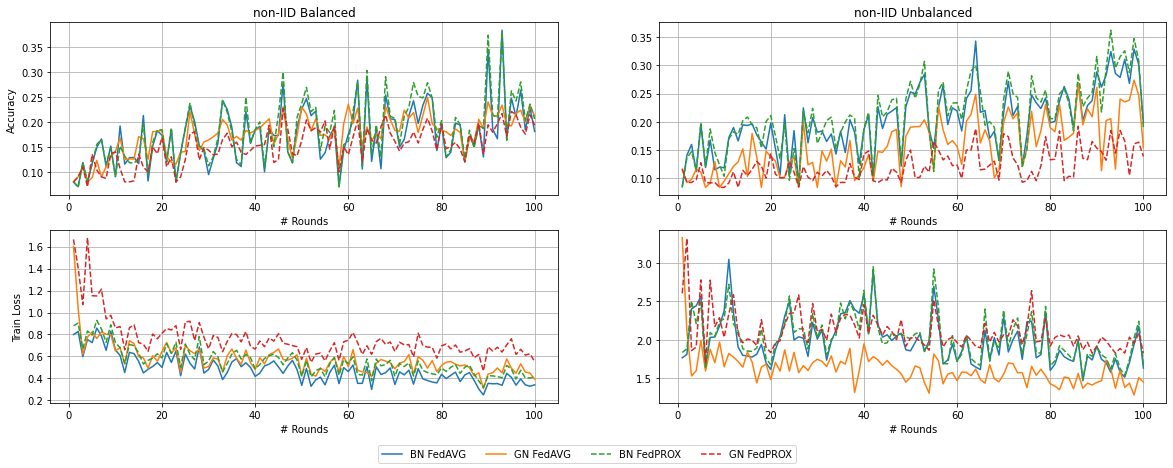

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20, 7))



ax[0][0].plot(epochs, non_iid_bBN['train_acc'], label='BN FedAVG')
ax[0][0].plot(epochs, non_iid_bGN['train_acc'],  label='GN FedAVG')

ax[0][0].plot(epochs, non_iid_bBN_proxi['train_acc'],linestyle='dashed', label='BN FedPROX')
ax[0][0].plot(epochs, non_iid_bGN_proxi['train_acc'], linestyle='dashed', label='GN FedPROX')

ax[0][0].set_ylabel('Accuracy')

ax[0][0].set_xlabel('# Rounds')

ax[0][0].set_title("non-IID Balanced")
ax[0][0].grid()

ax[0][1].plot(epochs, non_iid_uBN['train_acc'],  label='BN FedAVG')
ax[0][1].plot(epochs, non_iid_uGN['train_acc'],  label='GN FedAVG')

ax[0][1].plot(epochs, non_iid_uBN_proxi['train_acc'], linestyle='dashed', label='BN FedPROX')
ax[0][1].plot(epochs, non_iid_uGN_proxi['train_acc'],  linestyle='dashed',label='GN FedPROX')

ax[0][1].set_title("non-IID Unbalanced")
ax[0][1].grid()
ax[0][1].set_xlabel('# Rounds')


ax[1][0].plot(epochs, non_iid_bBN['train_loss'],  label='BN FedAVG')
ax[1][0].plot(epochs, non_iid_bGN['train_loss'],  label='GN FedAVG')
ax[1][0].set_xlabel('# Rounds')

ax[1][0].plot(epochs, non_iid_bBN_proxi['train_loss'], linestyle='dashed', label='BN FedPROX')
ax[1][0].plot(epochs, non_iid_bGN_proxi['train_loss'], linestyle='dashed', label='GN FedPROX')
ax[1][0].grid()

ax[1][0].set_ylabel('Train Loss')


ax[1][1].plot(epochs, non_iid_uBN['train_loss'],   label='BN FedAVG')
ax[1][1].plot(epochs, non_iid_uGN['train_loss'],  label='GN FedAVG')
ax[1][1].set_xlabel('# Rounds')


ax[1][1].plot(epochs, non_iid_uBN_proxi['train_loss'], linestyle='dashed',  label='BN FedPROX')
ax[1][1].plot(epochs, non_iid_uGN_proxi['train_loss'], linestyle='dashed', label='GN FedPROX')

ax[1][1].grid()

legendEntries = ("BN FedAVG","GN FedAVG","BN FedPROX","GN FedPROX")
# set figure legend entries, number of columns, location
fig.legend(legendEntries,ncol=len(legendEntries),loc="lower center")
#plt.xlabel('Epoch')

plt.show()
